In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Data/Insurance_files/aug_train.csv')

print("Training Data")
print(train.shape)
print(train.head())


Training Data
(382154, 12)
       id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0  167647    Male   22  ...                 152.0       16         0
1   17163    Male   42  ...                  26.0      135         0
2   32023  Female   66  ...                 124.0      253         0
3   87447  Female   22  ...                 152.0       69         0
4  501933    Male   28  ...                 152.0      211         0

[5 rows x 12 columns]


In [4]:
test = pd.read_csv('/content/drive/MyDrive/Data/Insurance_files/aug_test.csv')
print("Test Data")
print(test.shape)
print(test.head())

Test Data
(78273, 11)
       id  Gender  Age  ...  Annual_Premium  Policy_Sales_Channel  Vintage
0   57782  Female   34  ...         38244.0                 124.0      146
1  286811  Female   55  ...         37577.0                 122.0      109
2  117823    Male   39  ...         24578.0                  26.0       63
3  213992    Male   28  ...         40507.0                   8.0      129
4  324756  Female   24  ...         36783.0                 152.0      201

[5 rows x 11 columns]


In [5]:

data = np.load('/content/drive/MyDrive/Data/Insurance_files/answer.npy')
data

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
df = pd.DataFrame(data, columns = ['Response'])
df.head(10)


,Response
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [7]:
#horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)
test = pd.concat([test,df],axis = 1)
test.shape

(78273, 12)

In [8]:
train = pd.concat([train,test],axis = 0)

In [9]:
train.shape

(460427, 12)

In [10]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [11]:
train[['id',  'Gender', 'Age',  'Driving_License',  'Region_Code',  'Previously_Insured', 'Vehicle_Age',  'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Vintage','Response']].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000,460427.000000
mean,234325.116381,38.539210,0.998067,26.402544,0.489137,30710.552442,111.948891,154.297854,0.163802
std,139482.954692,15.225135,0.043923,13.175887,0.499883,17058.618703,54.283653,83.691475,0.370096
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115107.500000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,82.000000,0.000000
50%,230214.000000,36.000000,1.000000,28.000000,0.000000,31699.000000,145.000000,154.000000,0.000000
75%,345320.500000,49.000000,1.000000,35.000000,1.000000,39452.000000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [12]:
test[['id',  'Gender', 'Age',  'Driving_License',  'Region_Code',  'Previously_Insured', 'Vehicle_Age',  'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Vintage']].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000
mean,233993.913827,38.507570,0.997866,26.381434,0.488917,30707.042441,111.993216,154.827220
std,139265.743227,15.216589,0.046141,13.149780,0.499880,17044.185877,54.270018,83.476632
min,2.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,115579.000000,25.000000,1.000000,15.000000,0.000000,24548.000000,26.000000,83.000000
50%,229110.000000,36.000000,1.000000,28.000000,0.000000,31741.000000,150.000000,155.000000
75%,344739.000000,49.000000,1.000000,35.000000,1.000000,39476.000000,152.000000,227.000000
max,508136.000000,85.000000,1.000000,52.000000,1.000000,489663.000000,163.000000,299.000000


In [13]:
#The result shows it is a imbalance data set
train.Response.value_counts()


0    385008
1     75419
Name: Response, dtype: int64

In [14]:
#check if it is a imbalance dataset
no, yes = np.bincount(train['Response'])
total = no + yes
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, yes, 100 * yes / total))

Examples:
    Total: 460427
    Positive: 75419 (16.38% of total)



In [15]:
train_t = train.copy()
target = train_t.pop('Response')

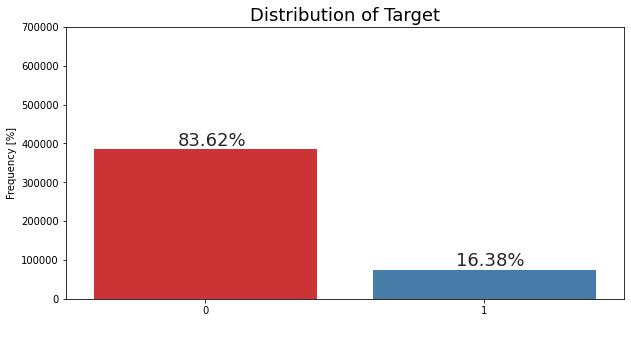

In [16]:

ax = sns.countplot(x = target ,palette="Set1")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=700000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(target)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of Target')

plt.ylabel('Frequency [%]')
plt.show()


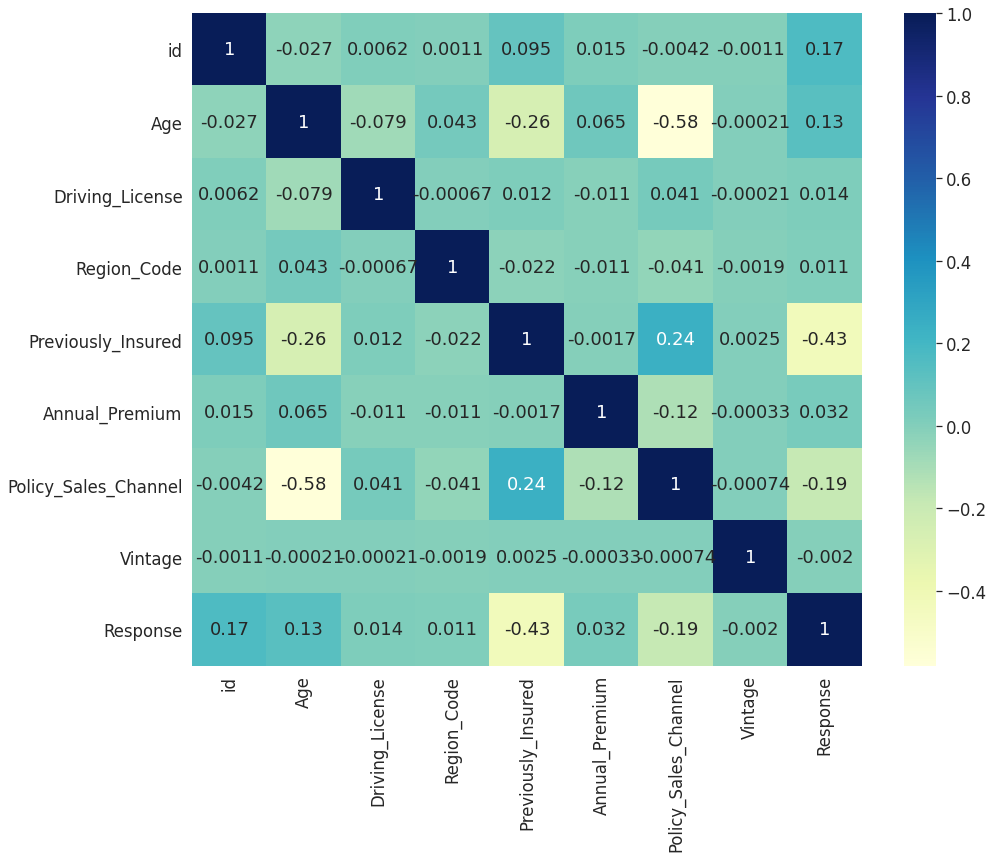

In [17]:
plt.figure(figsize=(15, 12))
sns.heatmap(pd.concat([train_t, target], axis=1).corr(),annot=True , cmap='YlGnBu') 

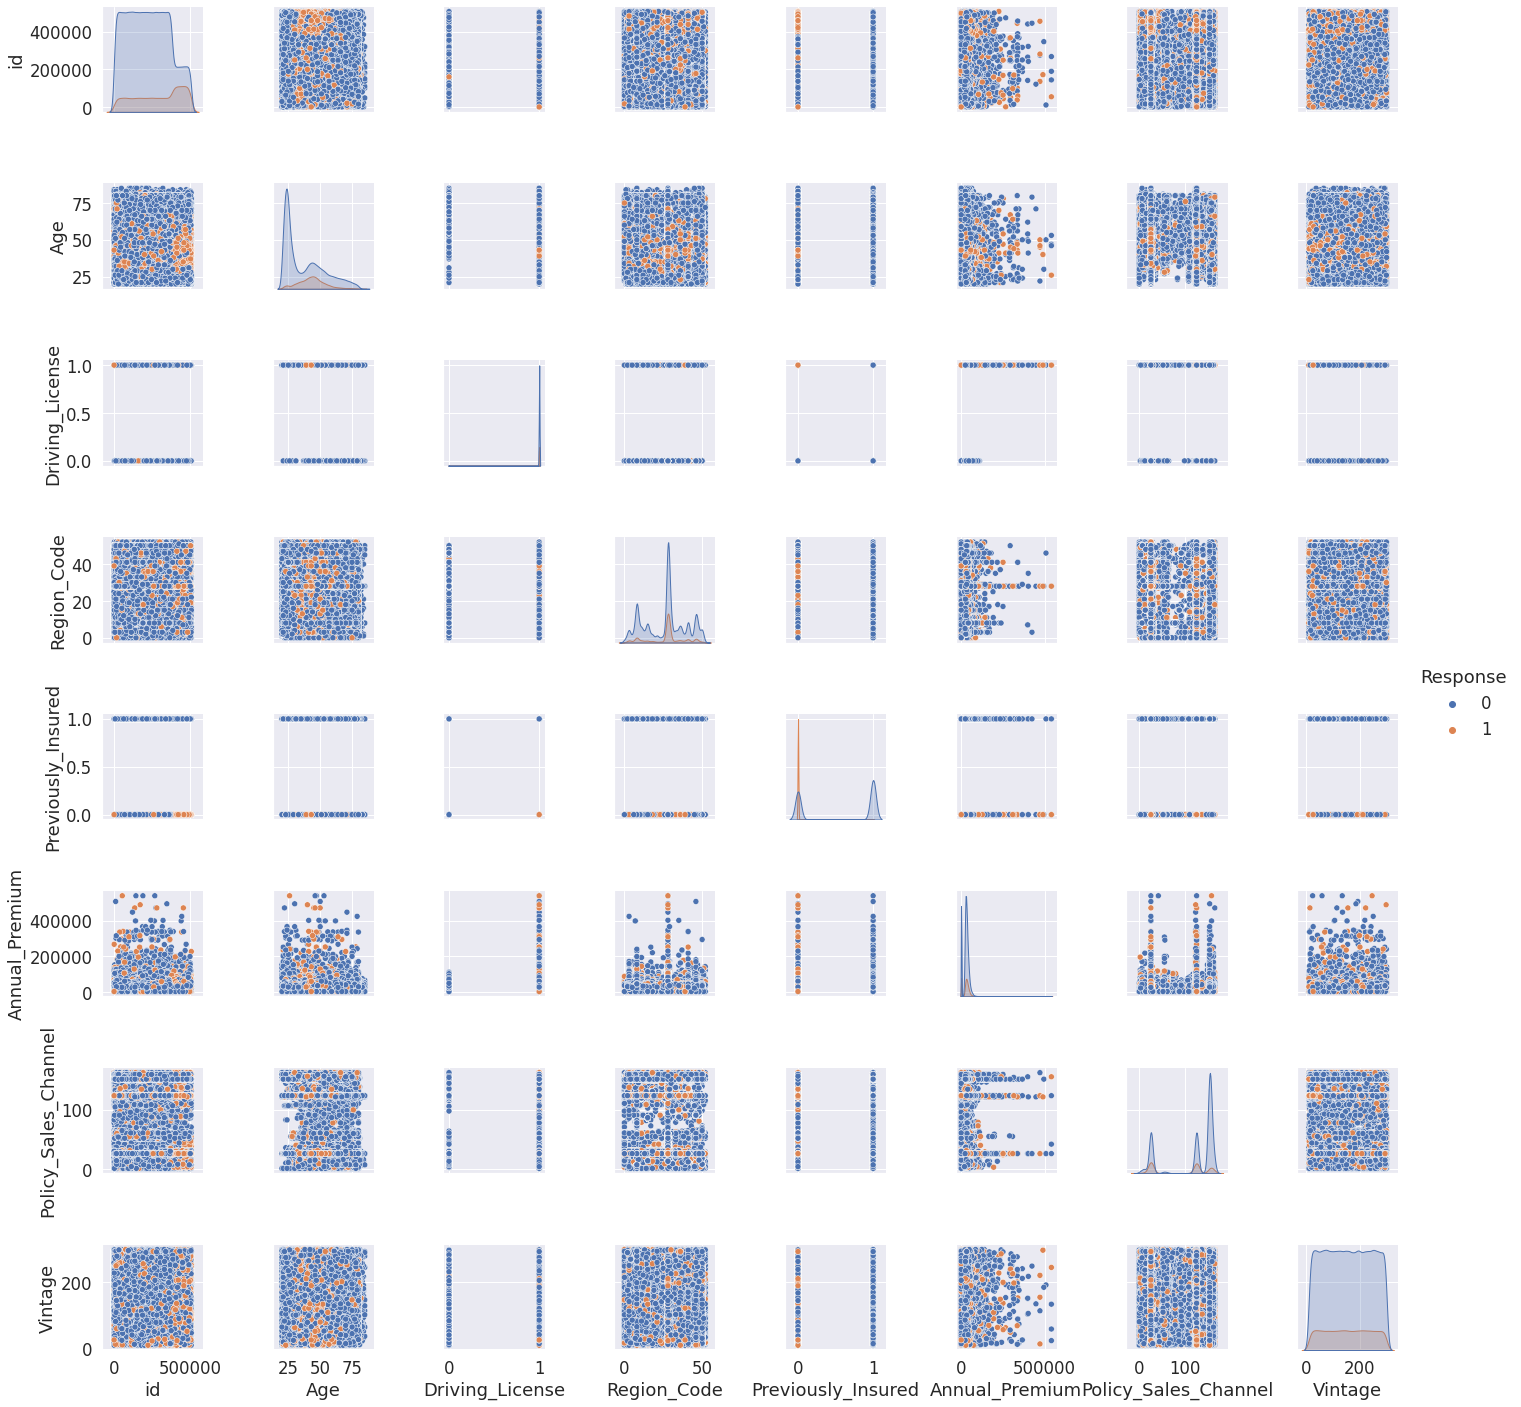

In [18]:
#Visualization
sns.pairplot(train,hue='Response')

In [19]:
#Check for null values
print('Missing data in Train')
print(train.isna().any())
print('Missing data in Test')
print(test.isna().any())


Missing data in Train
id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool
Missing data in Test
id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool


In [20]:
#check for data types
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [21]:
#Find the category and numeric - Convert the numeric to category variables.
cat=[]
for c in train.columns:
  if train[c].dtypes == 'object':
    cat.append(c)
print(cat)

num=[]
for c in train.columns:
  if c not in cat:
    num.append(c)
print(num)



['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [22]:
#Change the type from numeric
cat_ftrs = ['Region_Code','Previously_Insured', 'Policy_Sales_Channel', 'Vintage']
for col in cat_ftrs:
    train[col]=train[col].astype('object')

In [23]:
# Convert Age values
bins = [20, 30, 40, 50, 60, 85]

# Create Bins
train['age_bins'] = pd.cut(x=train['Age'], bins=bins, labels=['20-30', '30-40', '40-50', '50-60', '60+'])
train.drop(columns='Age', inplace=True)

In [24]:
train['age_bins'].value_counts()

20-30    188859
40-50     94565
30-40     68406
50-60     53165
60+       48455
Name: age_bins, dtype: int64

In [25]:
train.dtypes

id                         int64
Gender                    object
Driving_License            int64
Region_Code               object
Previously_Insured        object
Vehicle_Age               object
Vehicle_Damage            object
Annual_Premium           float64
Policy_Sales_Channel      object
Vintage                   object
Response                   int64
age_bins                category
dtype: object

In [26]:
#Change the type from numeric
cat_ftrs = ['Region_Code','Previously_Insured', 'Policy_Sales_Channel', 'Vintage']
for col in cat_ftrs:
    test[col]=test[col].astype('object')

In [27]:
test.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code              object
Previously_Insured       object
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                  object
Response                  int64
dtype: object

In [28]:
train = pd.get_dummies(train,drop_first=True)

In [29]:
test = pd.get_dummies(test,drop_first=True)

In [30]:
train.dtypes

id                   int64
Driving_License      int64
Annual_Premium     float64
Response             int64
Gender_Male          uint8
                    ...   
Vintage_299          uint8
age_bins_30-40       uint8
age_bins_40-50       uint8
age_bins_50-60       uint8
age_bins_60+         uint8
Length: 509, dtype: object

In [31]:
col=[]
for c in train.columns:
  col.append(c)
print(col)

['id', 'Driving_License', 'Annual_Premium', 'Response', 'Gender_Male', 'Region_Code_1.0', 'Region_Code_2.0', 'Region_Code_3.0', 'Region_Code_4.0', 'Region_Code_5.0', 'Region_Code_6.0', 'Region_Code_7.0', 'Region_Code_8.0', 'Region_Code_9.0', 'Region_Code_10.0', 'Region_Code_11.0', 'Region_Code_12.0', 'Region_Code_13.0', 'Region_Code_14.0', 'Region_Code_15.0', 'Region_Code_16.0', 'Region_Code_17.0', 'Region_Code_18.0', 'Region_Code_19.0', 'Region_Code_20.0', 'Region_Code_21.0', 'Region_Code_22.0', 'Region_Code_23.0', 'Region_Code_24.0', 'Region_Code_25.0', 'Region_Code_26.0', 'Region_Code_27.0', 'Region_Code_28.0', 'Region_Code_29.0', 'Region_Code_30.0', 'Region_Code_31.0', 'Region_Code_32.0', 'Region_Code_33.0', 'Region_Code_34.0', 'Region_Code_35.0', 'Region_Code_36.0', 'Region_Code_37.0', 'Region_Code_38.0', 'Region_Code_39.0', 'Region_Code_40.0', 'Region_Code_41.0', 'Region_Code_42.0', 'Region_Code_43.0', 'Region_Code_44.0', 'Region_Code_45.0', 'Region_Code_46.0', 'Region_Code_47.0'

In [32]:
tcol=[]
for c in test.columns:
  tcol.append(c)
print(col)

['id', 'Driving_License', 'Annual_Premium', 'Response', 'Gender_Male', 'Region_Code_1.0', 'Region_Code_2.0', 'Region_Code_3.0', 'Region_Code_4.0', 'Region_Code_5.0', 'Region_Code_6.0', 'Region_Code_7.0', 'Region_Code_8.0', 'Region_Code_9.0', 'Region_Code_10.0', 'Region_Code_11.0', 'Region_Code_12.0', 'Region_Code_13.0', 'Region_Code_14.0', 'Region_Code_15.0', 'Region_Code_16.0', 'Region_Code_17.0', 'Region_Code_18.0', 'Region_Code_19.0', 'Region_Code_20.0', 'Region_Code_21.0', 'Region_Code_22.0', 'Region_Code_23.0', 'Region_Code_24.0', 'Region_Code_25.0', 'Region_Code_26.0', 'Region_Code_27.0', 'Region_Code_28.0', 'Region_Code_29.0', 'Region_Code_30.0', 'Region_Code_31.0', 'Region_Code_32.0', 'Region_Code_33.0', 'Region_Code_34.0', 'Region_Code_35.0', 'Region_Code_36.0', 'Region_Code_37.0', 'Region_Code_38.0', 'Region_Code_39.0', 'Region_Code_40.0', 'Region_Code_41.0', 'Region_Code_42.0', 'Region_Code_43.0', 'Region_Code_44.0', 'Region_Code_45.0', 'Region_Code_46.0', 'Region_Code_47.0'

In [33]:
list(set(col) - set(tcol))

['Policy_Sales_Channel_143.0',
 'Policy_Sales_Channel_141.0',
 'Policy_Sales_Channel_41.0',
 'Policy_Sales_Channel_76.0',
 'age_bins_30-40',
 'Policy_Sales_Channel_149.0',
 'Policy_Sales_Channel_144.0',
 'age_bins_40-50',
 'Policy_Sales_Channel_75.0',
 'Policy_Sales_Channel_57.0',
 'age_bins_60+',
 'Policy_Sales_Channel_67.0',
 'Policy_Sales_Channel_2.0',
 'age_bins_50-60',
 'Policy_Sales_Channel_101.0',
 'Policy_Sales_Channel_27.0',
 'Policy_Sales_Channel_84.0',
 'Policy_Sales_Channel_80.0',
 'Policy_Sales_Channel_6.0',
 'Policy_Sales_Channel_33.0',
 'Policy_Sales_Channel_79.0',
 'Policy_Sales_Channel_81.0',
 'Policy_Sales_Channel_43.0',
 'Policy_Sales_Channel_123.0',
 'Policy_Sales_Channel_74.0',
 'Policy_Sales_Channel_83.0']

In [34]:

tr_id = train.pop('id')
te_id = test.pop('id')

In [35]:
train_copy = train.copy()
test_copy = test.copy()

In [36]:
#Remove the response
#res = train.pop('Response')

In [37]:
train.shape , test.shape

((460427, 508), (78273, 483))

In [38]:
trn_driving_lic = train.pop('Driving_License')
test_driving_lic = test.pop('Driving_License')


In [39]:
train.shape , test.shape

((460427, 507), (78273, 482))

In [40]:
train.head(5)

,Annual_Premium,Response,Gender_Male,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,Region_Code_4.0,Region_Code_5.0,Region_Code_6.0,Region_Code_7.0,Region_Code_8.0,Region_Code_9.0,Region_Code_10.0,Region_Code_11.0,Region_Code_12.0,Region_Code_13.0,Region_Code_14.0,Region_Code_15.0,Region_Code_16.0,Region_Code_17.0,Region_Code_18.0,Region_Code_19.0,Region_Code_20.0,Region_Code_21.0,Region_Code_22.0,Region_Code_23.0,Region_Code_24.0,Region_Code_25.0,Region_Code_26.0,Region_Code_27.0,Region_Code_28.0,Region_Code_29.0,Region_Code_30.0,Region_Code_31.0,Region_Code_32.0,Region_Code_33.0,Region_Code_34.0,Region_Code_35.0,Region_Code_36.0,Region_Code_37.0,...,Vintage_264,Vintage_265,Vintage_266,Vintage_267,Vintage_268,Vintage_269,Vintage_270,Vintage_271,Vintage_272,Vintage_273,Vintage_274,Vintage_275,Vintage_276,Vintage_277,Vintage_278,Vintage_279,Vintage_280,Vintage_281,Vintage_282,Vintage_283,Vintage_284,Vintage_285,Vintage_286,Vintage_287,Vintage_288,Vintage_289,Vintage_290,Vintage_291,Vintage_292,Vintage_293,Vintage_294,Vintage_295,Vintage_296,Vintage_297,Vintage_298,Vintage_299,age_bins_30-40,age_bins_40-50,age_bins_50-60,age_bins_60+
0,2630.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43327.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,35841.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,27645.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,29023.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
test.head(5)

,Age,Annual_Premium,Response,Gender_Male,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,Region_Code_4.0,Region_Code_5.0,Region_Code_6.0,Region_Code_7.0,Region_Code_8.0,Region_Code_9.0,Region_Code_10.0,Region_Code_11.0,Region_Code_12.0,Region_Code_13.0,Region_Code_14.0,Region_Code_15.0,Region_Code_16.0,Region_Code_17.0,Region_Code_18.0,Region_Code_19.0,Region_Code_20.0,Region_Code_21.0,Region_Code_22.0,Region_Code_23.0,Region_Code_24.0,Region_Code_25.0,Region_Code_26.0,Region_Code_27.0,Region_Code_28.0,Region_Code_29.0,Region_Code_30.0,Region_Code_31.0,Region_Code_32.0,Region_Code_33.0,Region_Code_34.0,Region_Code_35.0,Region_Code_36.0,...,Vintage_260,Vintage_261,Vintage_262,Vintage_263,Vintage_264,Vintage_265,Vintage_266,Vintage_267,Vintage_268,Vintage_269,Vintage_270,Vintage_271,Vintage_272,Vintage_273,Vintage_274,Vintage_275,Vintage_276,Vintage_277,Vintage_278,Vintage_279,Vintage_280,Vintage_281,Vintage_282,Vintage_283,Vintage_284,Vintage_285,Vintage_286,Vintage_287,Vintage_288,Vintage_289,Vintage_290,Vintage_291,Vintage_292,Vintage_293,Vintage_294,Vintage_295,Vintage_296,Vintage_297,Vintage_298,Vintage_299
0,34,38244.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,55,37577.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,24578.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28,40507.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24,36783.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(train, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Response'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Response'))
test_labels = np.array(test_df.pop('Response'))
#test_labels = data

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [43]:
test_features

array([[3.7393e+04, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [3.6102e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6300e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.7504e+04, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6300e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.9961e+04, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [44]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (294672,)
Validation labels shape: (73669,)
Test labels shape: (92086,)
Training features shape: (294672, 506)
Validation features shape: (73669, 506)
Test features shape: (92086, 506)


In [45]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)



In [46]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [47]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [48]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                8112      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.predict(train_features[:10])

array([[0.3756007 ],
       [0.5010538 ],
       [0.5214831 ],
       [0.3067959 ],
       [0.4771784 ],
       [0.5884403 ],
       [0.33374265],
       [0.530706  ],
       [0.25271487],
       [0.41610572]], dtype=float32)

In [50]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6477


In [51]:
initial_bias = np.log([yes/no])
initial_bias

array([-1.63020488])

In [52]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.15043706],
       [0.20381227],
       [0.32119846],
       [0.11890748],
       [0.09572443],
       [0.1782755 ],
       [0.12595093],
       [0.12549001],
       [0.13781652],
       [0.23668042]], dtype=float32)

In [53]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4573


In [54]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [55]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [56]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [57]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

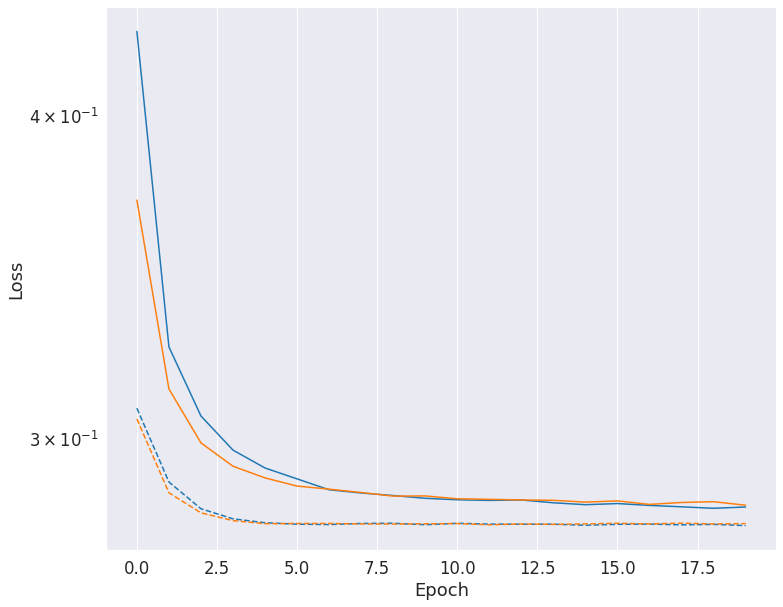

In [58]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [59]:
model = make_model()
#model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
144/144 [==============================] - 6s 26ms/step - loss: 0.4408 - tp: 3774.1103 - fp: 4150.9931 - tn: 182496.5379 - fn: 32733.9241 - accuracy: 0.8347 - precision: 0.4760 - recall: 0.1143 - auc: 0.7896 - val_loss: 0.3200 - val_tp: 753.0000 - val_fp: 676.0000 - val_tn: 60976.0000 - val_fn: 11264.0000 - val_accuracy: 0.8379 - val_precision: 0.5269 - val_recall: 0.0627 - val_auc: 0.8682
Epoch 2/100
144/144 [==============================] - 2s 17ms/step - loss: 0.3292 - tp: 4733.2621 - fp: 4495.3310 - tn: 120496.3862 - fn: 19761.5862 - accuracy: 0.8377 - precision: 0.5118 - recall: 0.1857 - auc: 0.8532 - val_loss: 0.2925 - val_tp: 1768.0000 - val_fp: 1492.0000 - val_tn: 60160.0000 - val_fn: 10249.0000 - val_accuracy: 0.8406 - val_precision: 0.5423 - val_recall: 0.1471 - val_auc: 0.8852
Epoch 3/100
144/144 [==============================] - 2s 17ms/step - loss: 0.3051 - tp: 5883.1172 - fp: 5408.5448 - tn: 119715.0414 - fn: 18479.8621 - accuracy: 0.8405 - precision: 0.5191

In [60]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

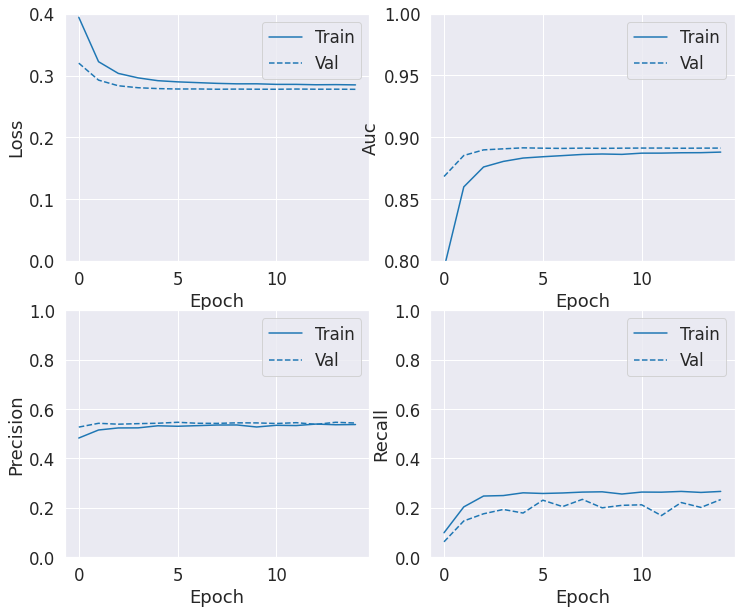

In [61]:
plot_metrics(baseline_history)

In [62]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [63]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print('(False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print('(True Positives): ', cm[1][1])
  print('Total : ', np.sum(cm[1]))

loss :  0.2805291712284088
tp :  2752.0
fp :  2157.0
tn :  74815.0
fn :  12362.0
accuracy :  0.8423321843147278
precision :  0.5606029629707336
recall :  0.18208283185958862
auc :  0.891067624092102

(True Negatives):  74815
(False Positives):  2157
(False Negatives):  12362
(True Positives):  2752
Total :  15114


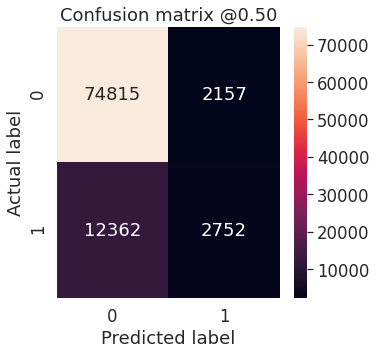

In [64]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [65]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

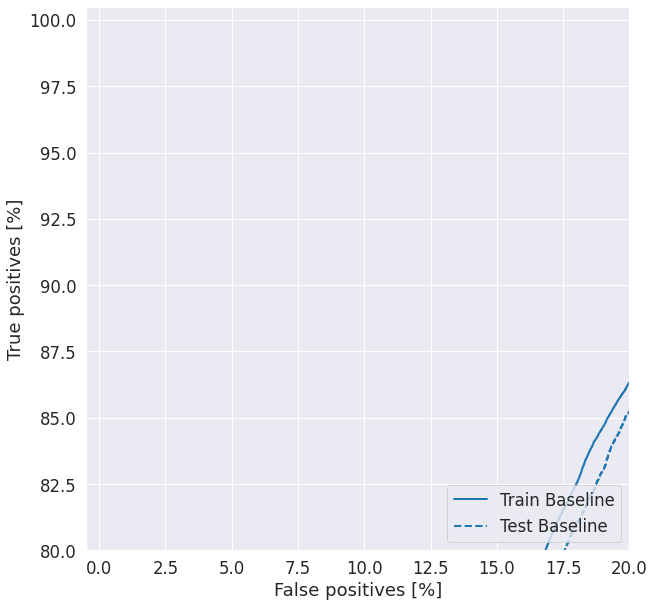

In [66]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [67]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / no)*(total)/2.0 
weight_for_1 = (1 / yes)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.60
Weight for class 1: 3.05


In [68]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
144/144 [==============================] - 5s 25ms/step - loss: 0.6953 - tp: 14871.5448 - fp: 26377.5517 - tn: 175653.8207 - fn: 24669.6483 - accuracy: 0.7961 - precision: 0.3839 - recall: 0.3363 - auc: 0.7863 - val_loss: 0.4615 - val_tp: 10625.0000 - val_fp: 14975.0000 - val_tn: 46677.0000 - val_fn: 1392.0000 - val_accuracy: 0.7778 - val_precision: 0.4150 - val_recall: 0.8842 - val_auc: 0.8755
Epoch 2/100
144/144 [==============================] - 2s 17ms/step - loss: 0.4768 - tp: 19001.1655 - fp: 27725.5310 - tn: 97243.2345 - fn: 5516.6345 - accuracy: 0.7769 - precision: 0.4060 - recall: 0.7710 - auc: 0.8529 - val_loss: 0.4165 - val_tp: 10896.0000 - val_fp: 15091.0000 - val_tn: 46561.0000 - val_fn: 1121.0000 - val_accuracy: 0.7799 - val_precision: 0.4193 - val_recall: 0.9067 - val_auc: 0.8886
Epoch 3/100
144/144 [==============================] - 2s 17ms/step - loss: 0.4368 - tp: 19994.6207 - fp: 28374.4759 - tn: 96565.5724 - fn: 4551.8966 - accuracy: 0.7802 - precision: 

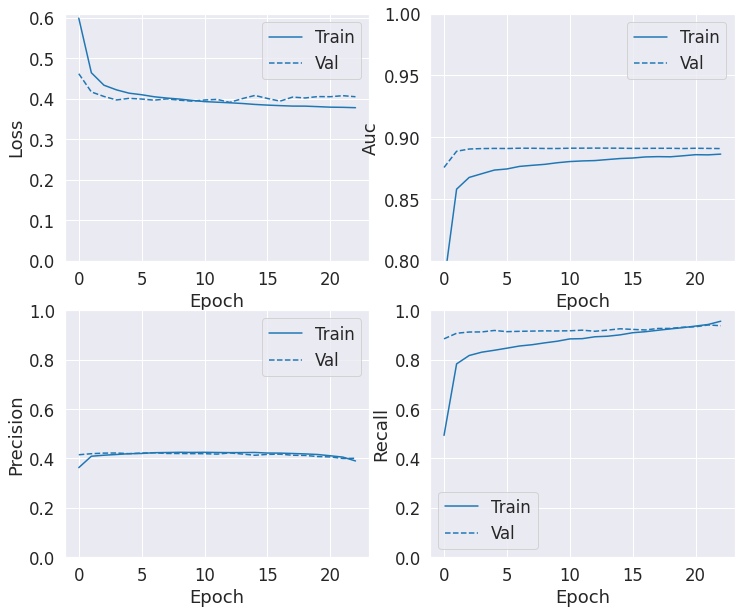

In [69]:
plot_metrics(weighted_history)

In [70]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.3889515995979309
tp :  13710.0
fp :  18503.0
tn :  58469.0
fn :  1404.0
accuracy :  0.7838216423988342
precision :  0.42560458183288574
recall :  0.9071059823036194
auc :  0.8904680013656616

(True Negatives):  58469
(False Positives):  18503
(False Negatives):  1404
(True Positives):  13710
Total :  15114


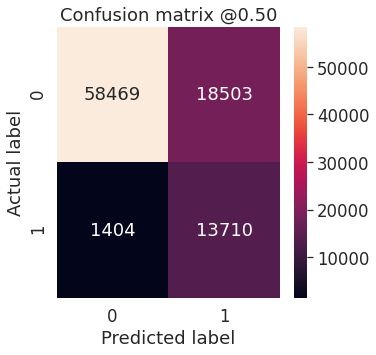

In [71]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

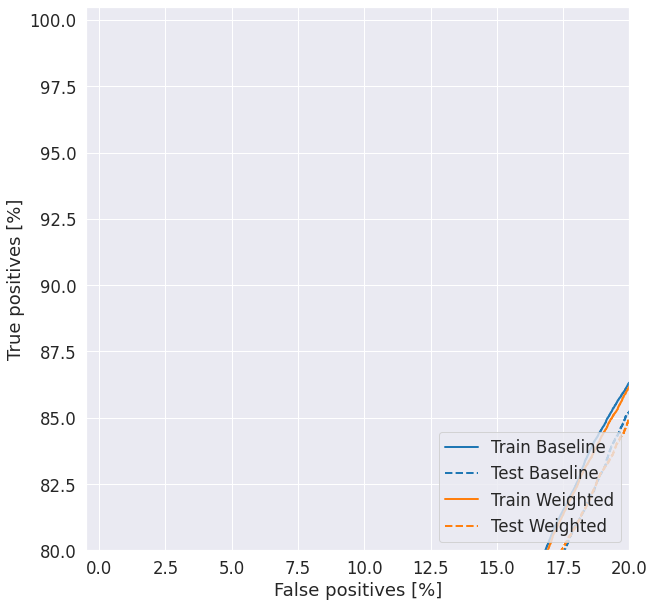

In [72]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [73]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [74]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [75]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 2.65241567e-01  9.27588530e-01 -4.97660750e-02 -9.94525535e-02
 -1.58484185e-01 -6.95862897e-02 -5.65098702e-02 -1.33041582e-01
 -9.28185856e-02 -3.11108665e-01 -8.83048751e-02 -1.08714476e-01
  5.00000000e+00 -9.20905367e-02 -1.02623165e-01 -1.14115613e-01
 -1.88074004e-01 -7.21498247e-02 -8.24780463e-02 -1.20275558e-01
 -6.15465841e-02 -6.77908605e-02 -1.08218047e-01 -5.73498325e-02
 -7.34454158e-02 -7.94847867e-02 -8.10267165e-02 -8.02593598e-02
 -8.17449993e-02 -6.23724198e-01 -1.77536211e-01 -1.85231330e-01
 -6.89680745e-02 -8.48635281e-02 -1.45925645e-01 -6.35156398e-02
 -1.38727802e-01 -1.51539450e-01 -1.15812653e-01 -7.39110280e-02
 -1.08810310e-01 -5.66908963e-02 -2.29107428e-01 -3.86706424e-02
 -8.25822503e-02 -4.53580674e-02 -1.22220770e-01 -2.35998469e-01
 -1.40030915e-01 -1.06764331e-01 -6.60771299e-02 -1.64763044e-01
 -2.21114871e-02 -2.62559797e-02 -9.78996917e-01 -8.77656115e-01
 -2.05931486e-01  1.03897078e+00 -3.19075459e-03 -3.68685048e-02
 -3.66834498e-

In [76]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [77]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5009765625


In [78]:
resampled_steps_per_epoch = np.ceil(2.0*no/BATCH_SIZE)
resampled_steps_per_epoch

376.0

In [79]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
376/376 [==============================] - 19s 44ms/step - loss: 0.5413 - tp: 171434.7454 - fp: 76348.0743 - tn: 194209.2812 - fn: 37160.4668 - accuracy: 0.7529 - precision: 0.6573 - recall: 0.8061 - auc: 0.8270 - val_loss: 0.4038 - val_tp: 11083.0000 - val_fp: 15666.0000 - val_tn: 45986.0000 - val_fn: 934.0000 - val_accuracy: 0.7747 - val_precision: 0.4143 - val_recall: 0.9223 - val_auc: 0.8909
Epoch 2/100
376/376 [==============================] - 15s 40ms/step - loss: 0.3923 - tp: 178797.0477 - fp: 50701.2599 - tn: 142816.9019 - fn: 14751.3581 - accuracy: 0.8301 - precision: 0.7791 - recall: 0.9215 - auc: 0.8817 - val_loss: 0.3999 - val_tp: 11168.0000 - val_fp: 16063.0000 - val_tn: 45589.0000 - val_fn: 849.0000 - val_accuracy: 0.7704 - val_precision: 0.4101 - val_recall: 0.9294 - val_auc: 0.8914
Epoch 3/100
376/376 [==============================] - 15s 40ms/step - loss: 0.3812 - tp: 181611.2706 - fp: 52917.4111 - tn: 141054.7984 - fn: 11483.0875 - accuracy: 0.8336 - pre

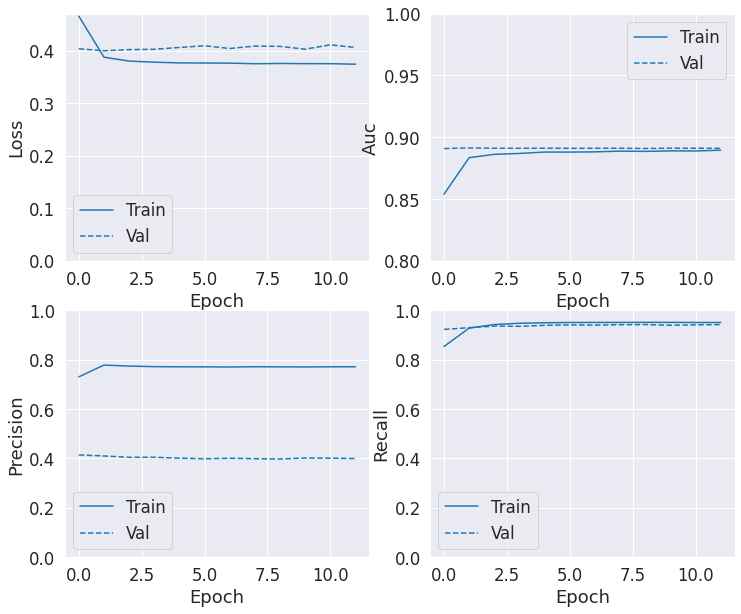

In [80]:
plot_metrics(resampled_history)

In [81]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.3975265920162201
tp :  13997.0
fp :  19787.0
tn :  57185.0
fn :  1117.0
accuracy :  0.7729948163032532
precision :  0.4143085479736328
recall :  0.9260950088500977
auc :  0.8907951712608337

(True Negatives):  57185
(False Positives):  19787
(False Negatives):  1117
(True Positives):  13997
Total :  15114


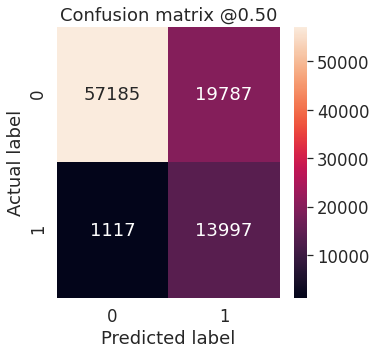

In [82]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

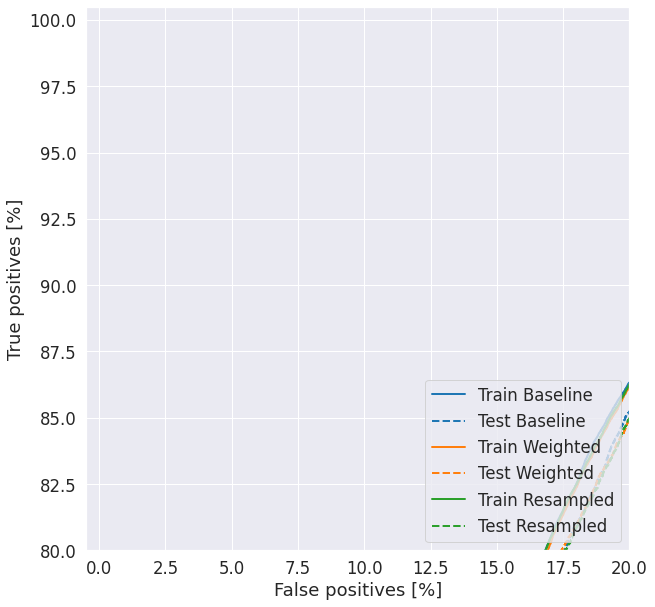

In [83]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')